### Data Source:
 - https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023?select=creditcard_2023.csv
 - The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines.

### Business Problem: 
Credit card fraud is a significant challenge for financial institutions worldwide, costing the industry billions of dollars annually. Fraudulent transactions not only result in financial losses but also erode customer trust and increase operational costs for banks and credit card companies. The problem at hand involves detecting fraudulent transactions in a financial dataset. The goal is to classify transactions as either fraudulent or legitimate based on various features (such as transaction amount, user behavior, and transaction type). This classification is crucial because fraud detection is a high-priority task for businesses in the financial sector, as it helps to prevent significant financial losses and protect customers.

### Current Challenges:
The challenge lies in classifying the minority class (fraudulent transactions), which is often underrepresented in the dataset, leading to potential issues with model performance (such as poor recall for fraud detection)
High Volume of Transactions: Millions of transactions occur daily, making it difficult to manually detect fraudulent activity. Customer Experience: Overzealous fraud detection systems may flag legitimate transactions, causing inconvenience to customers and potential loss of business.

### Objective:
The goal of this project is to build a machine learning model to accurately detect fraudulent transactions in real-time, minimizing financial losses and maintaining customer satisfaction.

### Solution Method
To tackle this problem the solution was broken down into several key steps:

 - Data Preprocessing:
        Checked for missing and duplicate values
        Checked for Imbalanced Classes
        Scaled numeric feature: The Amount feature was scaled using StandardScaler to normalize its values, ensuring that the model isn't biased by differences in feature magnitudes.
        
 - Model Selection:
    I compared the performance of three different models: Random Forest Classifier: Chosen for its ability to handle non-linear relationships, and effectiveness with imbalanced datasets. Logistic Regression: A simpler, linear model used to set a baseline for comparison. Decision Tree Classifier: Chosen for its interpretability and ability to handle non-linear relationships. After training and evaluation, the Random Forest model outperformed the other models in terms of precision, recall, and f1-score, making it the best choice for this problem.
    
 - Hyperparameter Tuning:
    I used GridSearchCV to find the best hyperparameters for the Random Forest model, which were max_depth=20, min_samples_leaf=1, min_samples_split=5, and n_estimators=200. This step ensured that we obtained the most optimal configuration for the model.
 
 - Regularization: Integrated regularization techniques into the Random Forest model.In this model, regularization is achieved through structural constraints which aims to regulate the growth of decision trees, making them less likely to overfit the training data.
 
 - Feature Engineering: Add Interaction Terms: Create new features as combinations of the top features.
    
 - Model Evaluation:
   I evaluated the models on both training and test datasets. Key performance metrics such as precision, recall, f1-score, and accuracy were calculated. Confusion matrix and ROC curve were also used to visualize performance and check how well the model discriminates between fraudulent and non-fraudulent transactions.
   
 - Test Error Analysis: I analyzed misclassified instances to gain insights into potential edge cases or patterns where the model struggled, which could help in refining the model further.

 - Deployability:
    The model was wrapped in a pipeline to ensure consistent preprocessing during training and prediction. This pipeline was saved using joblib for easy deployment in production environments.

### Results
The Random Forest model achieved excellent performance on both the training and test sets. The precision, recall, and f1-score values were near-perfect, especially for the fraud class (1), demonstrating the model's ability to correctly identify fraudulent transactions.
   - Test Set Performance:
     -  Accuracy Score:98.7%

     - F1 Score:98.7%

     - Recall_score:97.7%

     - Precision_score:99.7%

### Business Impact

 - Reduction of Financial Losses: With a precision of 99.87% and a recall of 97.29%, the model is highly effective in identifying fraudulent transactions while minimizing the risk of false positives. This helps businesses reduce financial losses due to fraud. 
 - Customer Trust: By identifying fraudulent transactions in real-time, financial institutions can protect their customers, prevent unauthorized transactions, and maintain customer trust.
 - Operational Efficiency: The model can be deployed in a production environment to automate fraud detection, reducing the need for manual checks and improving operational efficiency.
 - Scalability: The solution is scalable and can be applied to large datasets, making it suitable for deployment in any financial institution handling a significant volume of transactions.

### Feature description:       
   - id: Unique identifier for each transaction
   - V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
   - Amount: The transaction amount
   - Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data
df= pd.read_csv('creditcard_2023.csv')

### Data Preprocessing

- Goal: Prepare the dataset for analysis and modeling by handling irrelevant data, missing values,duplicate values and scaling.

   - Drop the id column as it does not provide information relevant to fraud detection.
   - Verify that the dataset has no missing values.
   - Scale the Amount column to normalize the range of values, ensuring all features contribute equally to the model.

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.shape

(568630, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
df = df.drop('id', axis = 1)

In [9]:
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.12628,-0.434824,-0.08123,-0.151045,17982.1,0


### Exploratory Data Analysis (EDA)

 - Goal: Gain insights into the data and detect imbalances or patterns.

   - Examine the distribution of the target variable (Class) to identify class imbalance.
   - Visualize distributions of numerical features (e.g., V1, V2, etc.) to understand patterns and detect outliers.
   - Create correlation heatmaps to observe relationships between features.

### Check for Class Imbalance

 - Goal: Balance the dataset to improve model performance on the minority class (fraud cases).

   - Use the SMOTE technique to oversample the minority class, ensuring the dataset has equal representation of fraud and non-fraud cases.

In [10]:
fraud = df[df['Class'] == 1]
n_fraud = df[df['Class'] == 0]

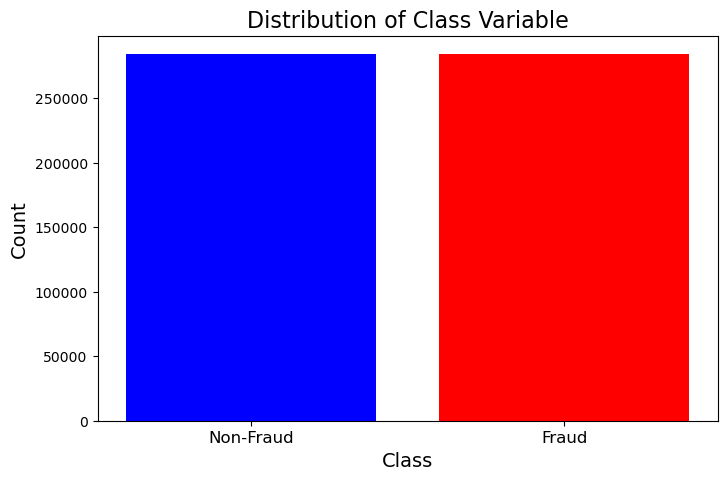

In [11]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], fontsize=12)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Class Variable', fontsize=16)
plt.show()


In [12]:
class_counts # target variable is balanced, no data balancing techniques are needed

0    284315
1    284315
Name: Class, dtype: int64

In [13]:
# Summary statistics for all features
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
V10,568630.0,1.991314e-16,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


In [14]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


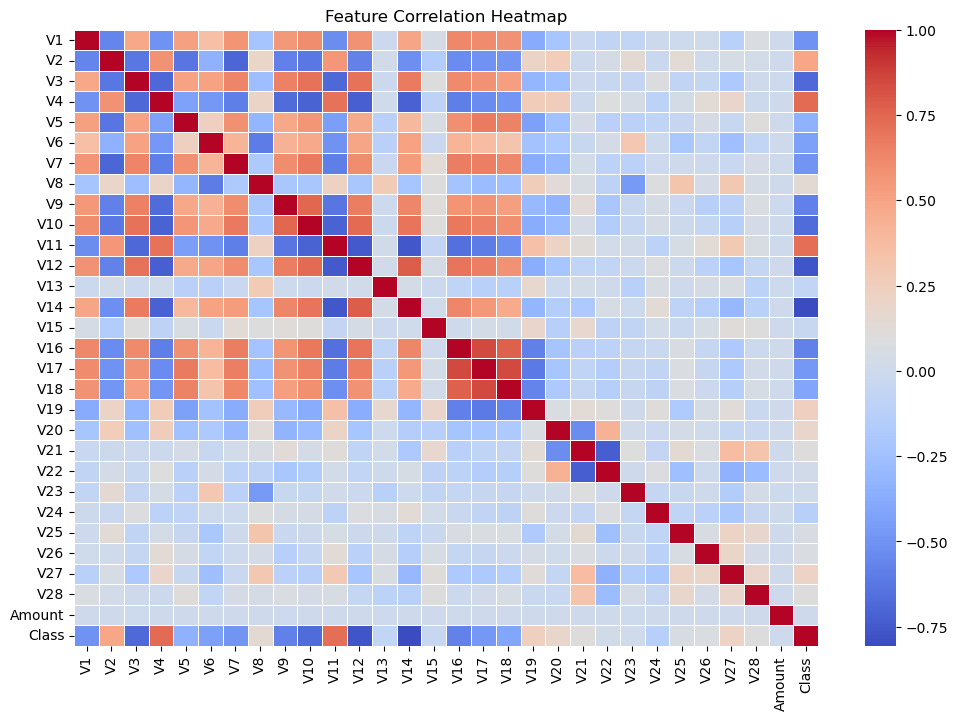

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()  

# Create the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Feature Correlation Heatmap')

# Show the plot
plt.show()

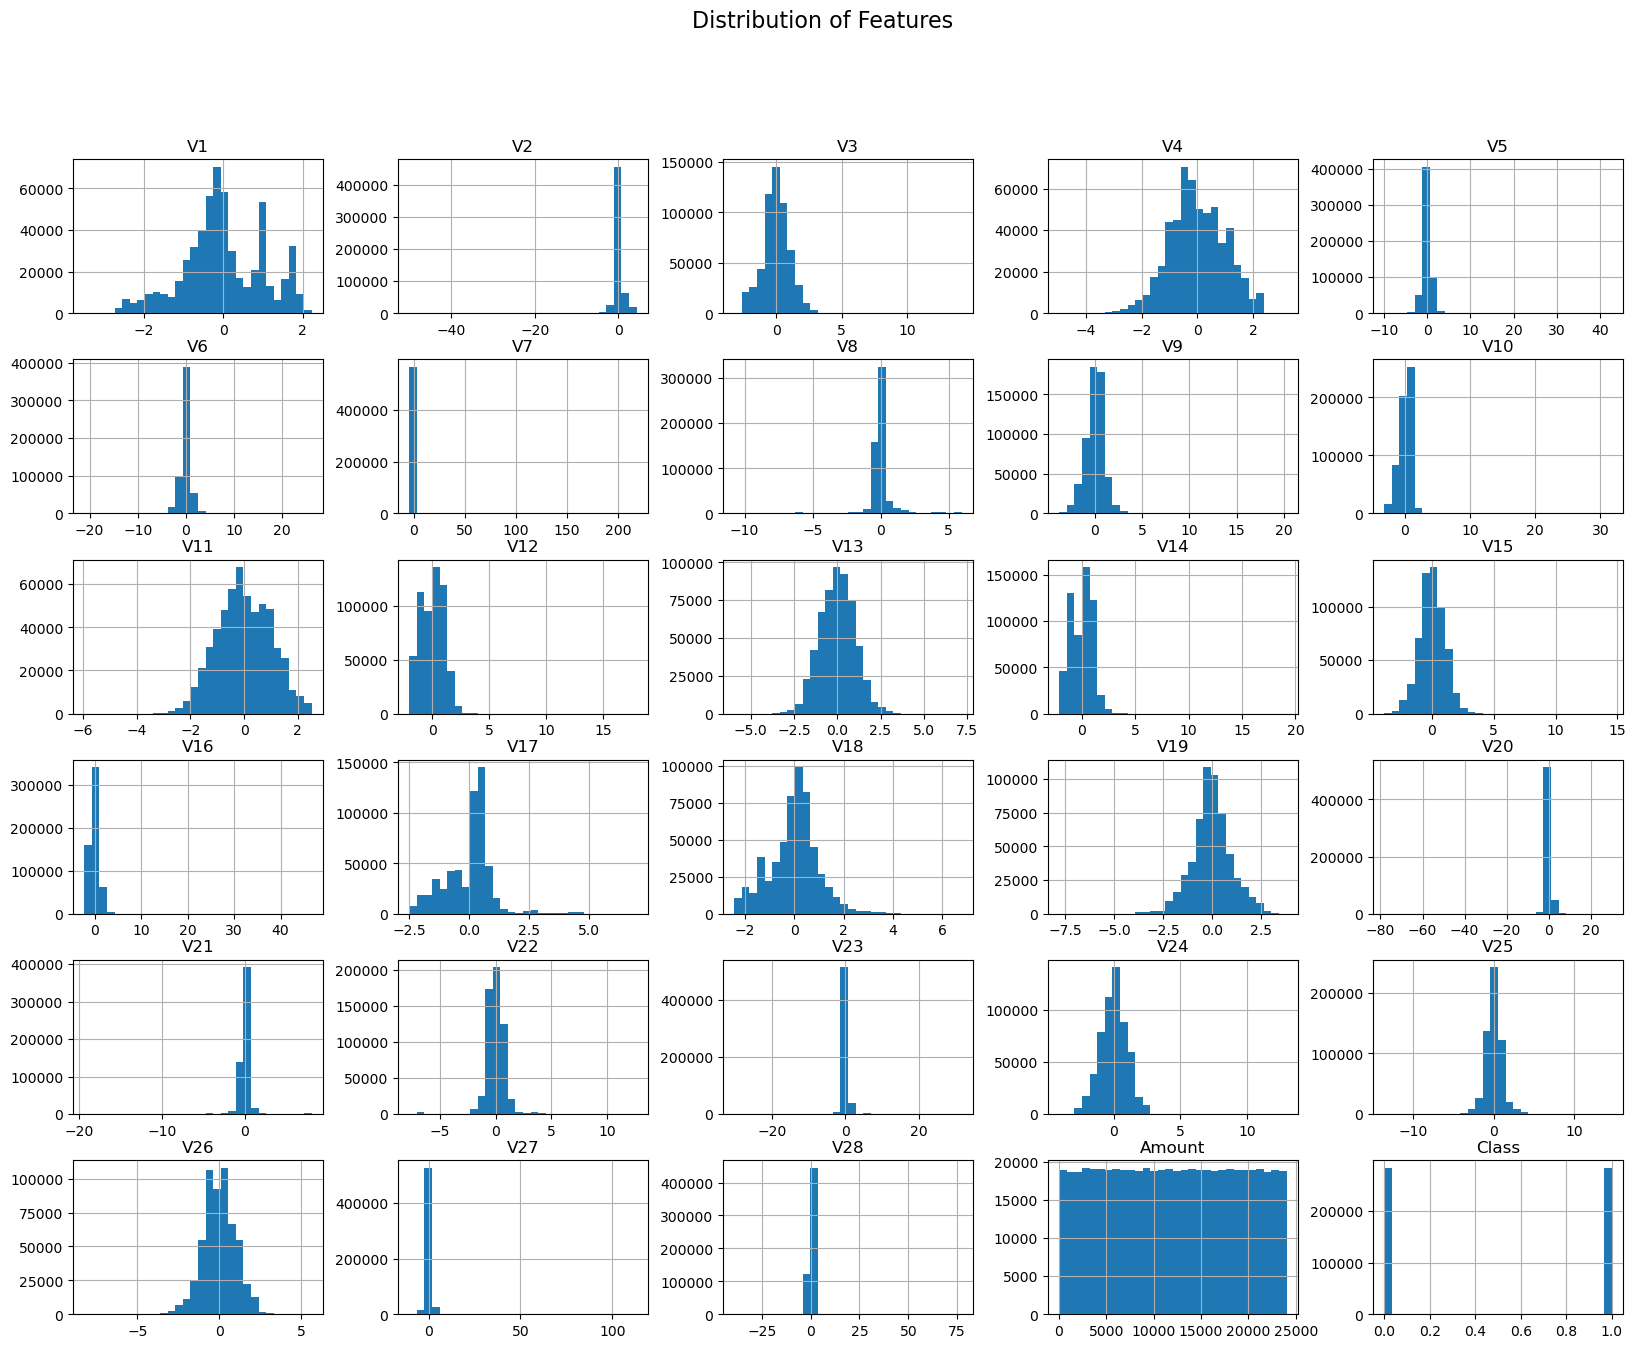

In [16]:
# feature distributions
# Plot histograms for all features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()


In [17]:
# Look for outliers
from scipy.stats import zscore

# Calculate Z-scores for all features
z_scores = zscore(df.drop('Class', axis=1))

# Identify outliers (values with Z > 3 or Z < -3)
outliers = (z_scores > 3) | (z_scores < -3)
print("Number of Outliers in Each Feature:", outliers.sum(axis=0))


Number of Outliers in Each Feature: V1            4
V2        12203
V3         1274
V4         1296
V5         6646
V6         5888
V7         7140
V8        17459
V9         4644
V10        3636
V11         467
V12         823
V13        1928
V14        1372
V15        2110
V16        2205
V17        6069
V18        4086
V19        3530
V20       10646
V21       10165
V22        9652
V23        9656
V24         513
V25        7758
V26        2871
V27       13337
V28       12590
Amount        0
dtype: int64


In [18]:
Q1 = df.quantile(0.25)  # 25th percentile
Q3 = df.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1           # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)
print("Outliers in Dataset:")
print(outliers.sum())


Outliers in Dataset:
V1           30
V2        43620
V3         4300
V4         2766
V5        71015
V6        48854
V7        55997
V8        93856
V9        18939
V10       10710
V11         709
V12         700
V13        4197
V14        1088
V15        6780
V16        4546
V17       14890
V18       16676
V19       19519
V20       65708
V21       57138
V22       13706
V23       72056
V24        2029
V25       28089
V26        6554
V27       82235
V28       70242
Amount        0
Class         0
dtype: int64


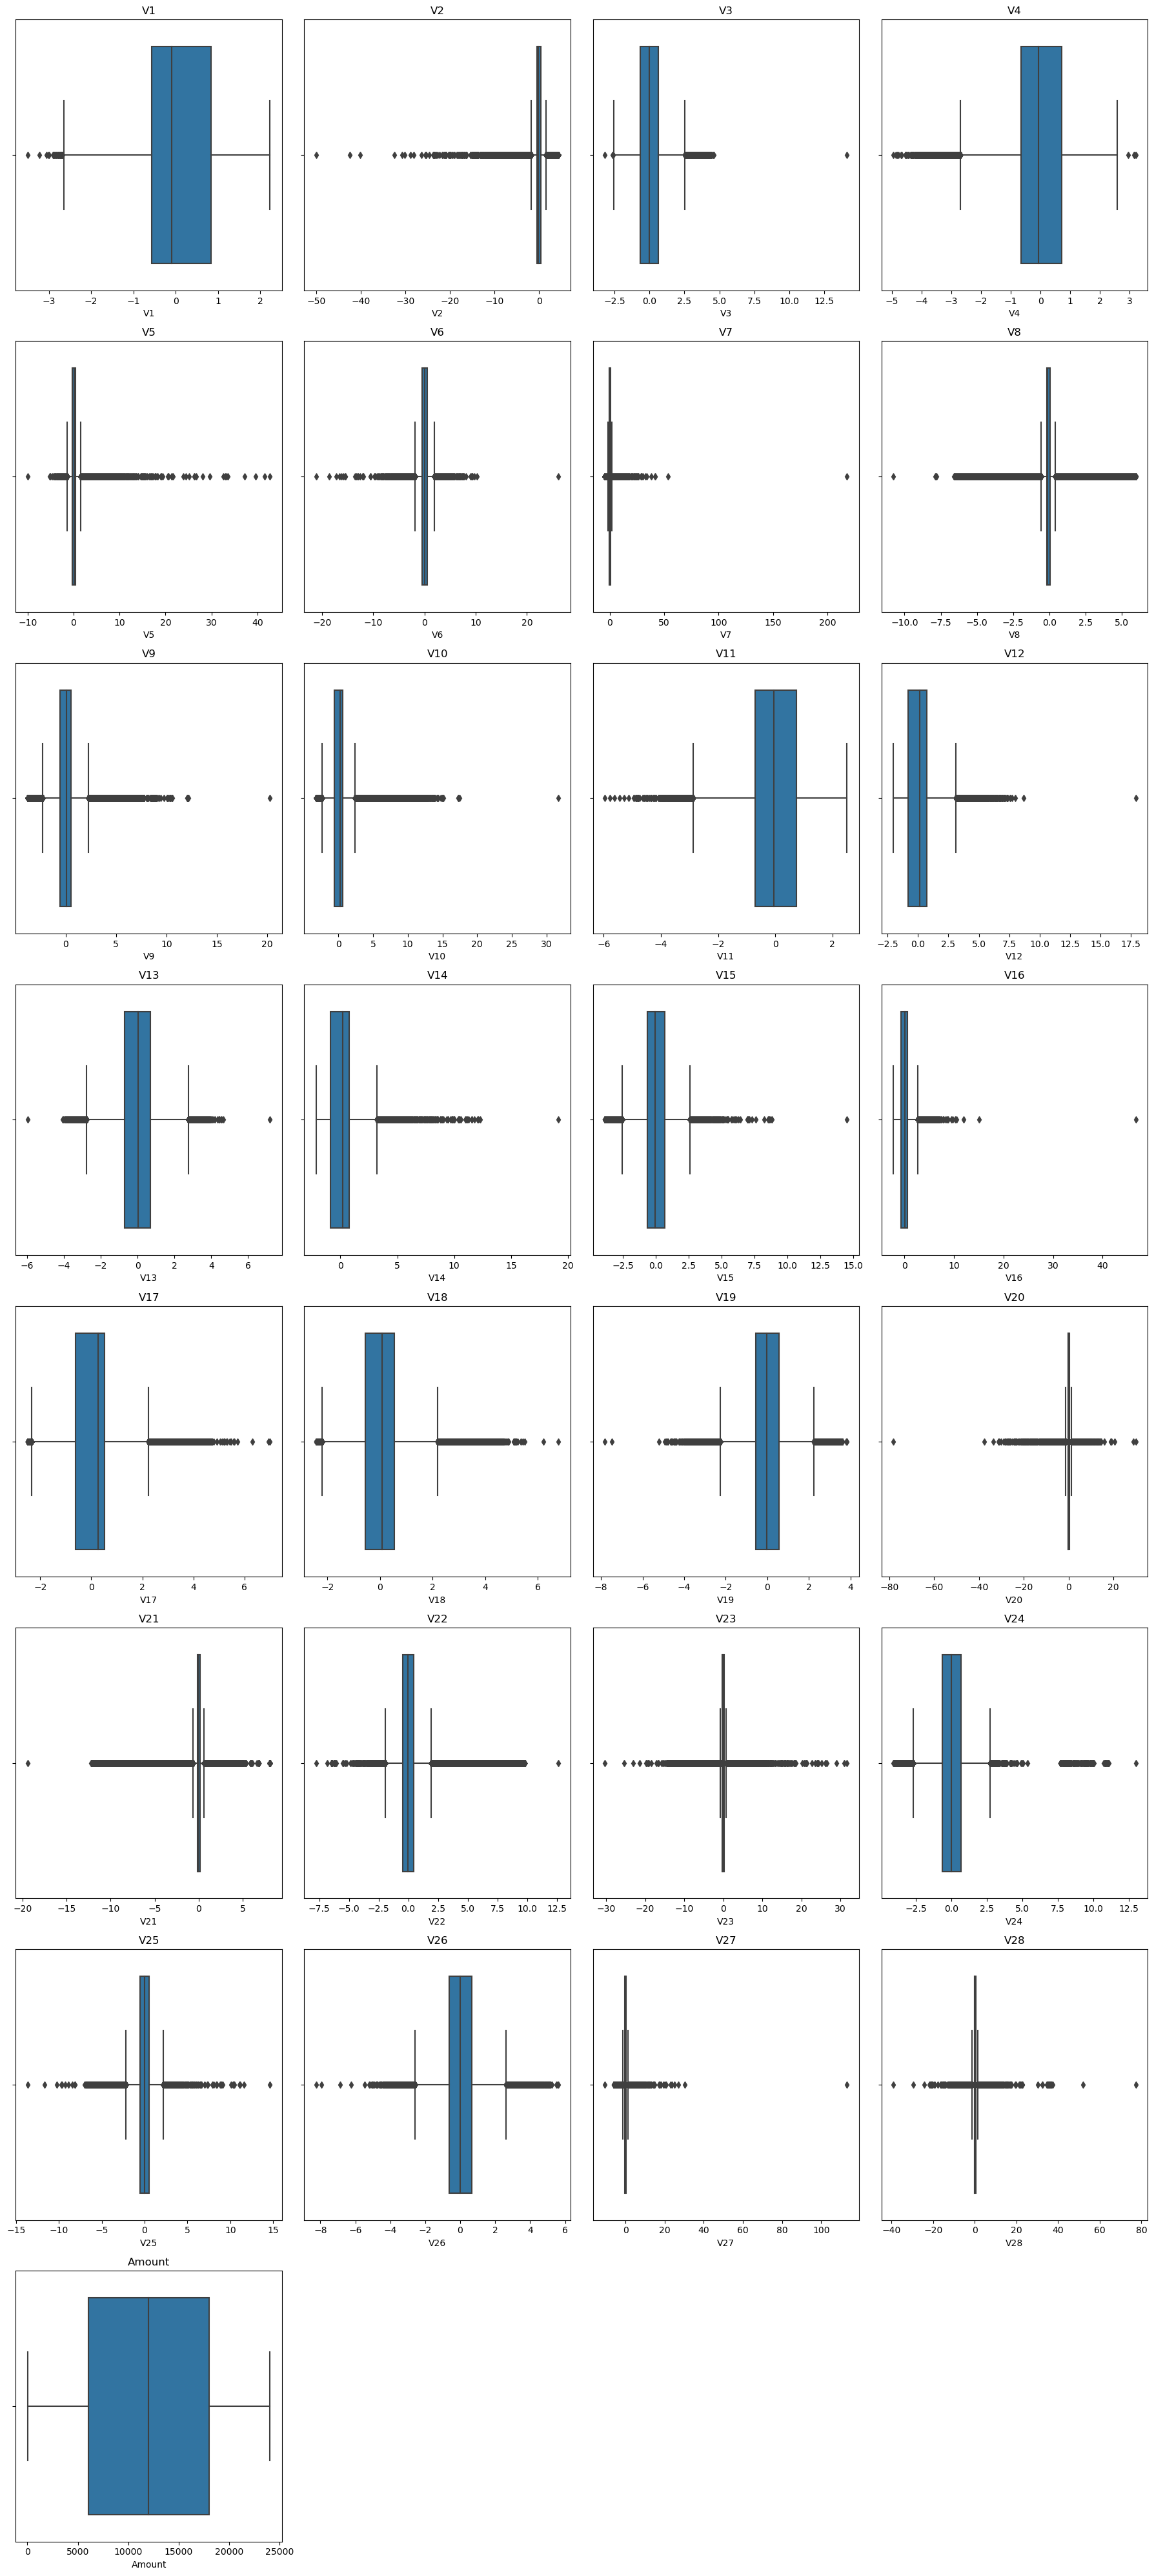

In [19]:
# visulize outliers

# Remove the 'id' column and the target variable 'Class' from the dataset
df_no_id_class = df.drop(['Class'], axis=1)

# Select numerical features (drop the target variable and 'id' column)
numerical_features = df_no_id_class.select_dtypes(include=['float64']).columns

# Calculate the number of rows and columns needed for the boxplots
num_features = len(numerical_features)
ncols = 4  # Number of columns
nrows = (num_features // ncols) + (num_features % ncols > 0)  # Calculate rows based on number of features

# Set up the figure and axes for the subplots (adjust the number of rows and columns as needed)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))  # Adjust rows and columns as needed
axes = axes.flatten()  # Flatten to make it easier to iterate over the axes

# Plot the boxplot for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df_no_id_class[feature], ax=axes[i])  # Create boxplot for each feature
    axes[i].set_title(feature)  # Title of each subplot

# Hide any unused axes if there are fewer features than subplots
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Adjust layout to ensure there's no overlap
plt.tight_layout()
plt.show()




### Data Splitting
 - Goal: Split the dataset into training and testing subsets for model validation.

   - Divide data into 80% training and 20% testing, ensuring the model is evaluated on unseen data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Class', axis =1)
y = df['Class'] # target variable

In [22]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Scaling -> using StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Scale 'Amount' feauture to normalize values

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

# Transform the test data using the same scaler
X_test['Amount'] = scaler.transform(X_test[['Amount']])


In [25]:
X_train['Amount']

373474   -0.268759
424048    0.040903
409855   -1.297030
90244     1.402121
175414   -0.343288
            ...   
110268    1.497326
259178   -0.911117
365838    0.997326
131932   -0.752192
121958   -1.455378
Name: Amount, Length: 454904, dtype: float64

### Model Building

 - Goal: Train machine learning models to detect fraud.

   - Test multiple algorithms such as Logistic Regression, Random Forest, and Gradient Boosting to identify the best-performing model.
   - Evaluate each model using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [27]:
# create a dicionary of models to use

classifier = {'Logistic Regression' : LogisticRegression(),
           'Random Forest': RandomForestClassifier(),
           'Decision Tree' : DecisionTreeClassifier()}

for name, clf in classifier.items():
    print(f'\n------------{name}------------')
    clf.fit(X_train,y_train)
    y_preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_preds)
    print(f'\n Accuracy Score:{accuracy_score(y_test,y_preds)}')
    print(f'\n F1 Score:{f1_score(y_test,y_preds)}')
    print(f'\n Recall_score:{recall_score(y_test,y_preds)}')
    print(f'\n Precision_score:{precision_score(y_test,y_preds)}')
    


------------Logistic Regression------------

 Accuracy Score:0.9652761901412166

 F1 Score:0.9649049527652124

 Recall_score:0.9528046896939062

 Precision_score:0.9773165067420383

------------Random Forest------------

 Accuracy Score:0.9998417248474404

 F1 Score:0.9998420637009738

 Recall_score:1.0

 Precision_score:0.9996841772818191

------------Decision Tree------------

 Accuracy Score:0.998188628809595

 F1 Score:0.9981936162749913

 Recall_score:0.9989644762707105

 Precision_score:0.997423945044161


Random Forest performs exceptionally well, with perfect recall and near-perfect precision. The very high accuracy and F1 score suggest it is highly effective in detecting fraudulent transactions without missing any fraud cases. This model is likely the best performer to solve business problem.

### Hyperparameter Tuning

 - Goal: Optimize the model to improve accuracy and reduce overfitting.

   - Use grid search and cross-validation to find the best combination of hyperparameters.
  

In [28]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
373474,0.312289,0.256749,-0.348959,0.804888,0.196888,-0.139495,-0.081428,-0.240777,-0.788505,-0.243153,...,0.422273,-0.098466,-0.106306,-0.259423,-0.537555,1.191314,0.638648,0.508251,0.867163,-0.268759
424048,-0.738924,0.882741,-1.100036,1.183329,-0.584835,-0.626543,-0.632471,0.538635,-0.949273,-0.889646,...,-0.147838,0.322355,0.530422,0.169279,-0.304172,-0.665394,0.207433,-0.132937,-0.949555,0.040903
409855,-0.277764,0.174947,-0.475947,-0.007279,-0.181876,-0.128142,-0.227282,-0.388552,0.184313,-0.556194,...,0.376360,0.462207,-0.214574,-0.080741,-1.018650,0.036501,0.493731,-0.095556,-0.961754,-1.297030
90244,-0.195993,-0.470999,2.492314,-0.416324,-0.062093,0.642238,0.213857,-0.122787,1.595950,0.471956,...,-0.353785,-0.096748,0.508039,-0.196086,1.184552,-1.188919,2.114474,-0.591308,0.518468,1.402121
175414,1.786631,-0.574048,-0.251302,-1.011117,1.518896,2.140143,0.282776,0.034446,0.753873,0.638629,...,-0.321018,-0.222583,-0.771246,0.371304,1.509223,-0.507466,0.497143,-0.296853,-0.261746,-0.343288


In [29]:
y_train.head()

373474    1
424048    1
409855    1
90244     0
175414    0
Name: Class, dtype: int64

### handling overfitting with regularization
In this model, regularization is achieved through structural constraints:

 -   max_depth: Limits tree depth to prevent overly complex splits.
 -   min_samples_split: Ensures nodes are split only if they have enough data.
 - min_samples_leaf: Prevents leaves with very few samples.
 -   max_features: Reduces the number of features considered at each split, increasing randomness and reducing overfitting.
 -   class_weight='balanced': Adjusts class weights to handle imbalanced datasets.

These constraints regulate the growth of decision trees, making them less likely to overfit the training data.

In [30]:
# Random Forest with Regularization

# Initialize Random Forest with regularization
model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Limit depth of each tree
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider a subset of features
    class_weight='balanced',   # Handle class imbalance
    random_state=42            # Ensure reproducibility
)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
y_preds = model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

# Performance metrics
print(f'\n Accuracy Score:{accuracy_score(y_test,y_preds)}')
print(f'\n F1 Score:{f1_score(y_test,y_preds)}')
print(f'\n Recall_score:{recall_score(y_test,y_preds)}')
print(f'\n Precision_score:{precision_score(y_test,y_preds)}')

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


 Accuracy Score:0.9857904085257548

 F1 Score:0.9856332568766558

 Recall_score:0.9729184217916316

 Precision_score:0.998684826865564


In [31]:
# Perform cross-validation on the entire dataset using the best parameters to ensure stability across multiple splits

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9853138244552696


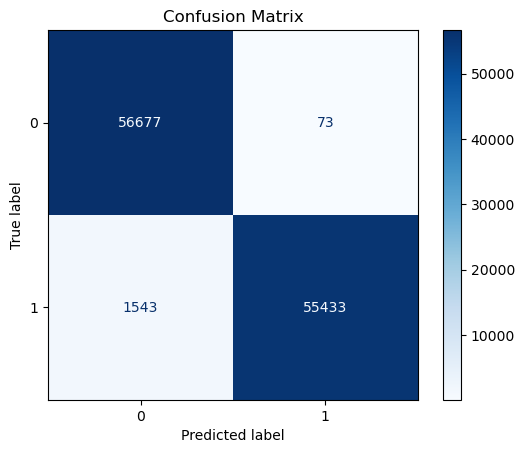

In [32]:
# detailed view of the true positives, true negatives, false positives, and false negatives.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [33]:
# Create a DataFrame to store predictions and actual labels
error_analysis = pd.DataFrame({
    'Actual': y_test.values,       # Ensure indices align
    'Predicted': y_preds,
    'Correct': y_test.values == y_preds
})

# Extract misclassified instances
misclassified = error_analysis[error_analysis['Correct'] == False]

# Get the corresponding rows from X_test
misclassified_data = X_test.iloc[misclassified.index.to_numpy()]

# Display some of the misclassified instances
print("Misclassified instances:")
print(misclassified.head())

print("\nFeatures of misclassified instances:")
print(misclassified_data)


Misclassified instances:
     Actual  Predicted  Correct
72        1          0    False
125       1          0    False
294       1          0    False
329       1          0    False
330       1          0    False

Features of misclassified instances:
              V1        V2        V3        V4        V5        V6        V7  \
521633 -0.090983 -0.186517  0.819777 -0.654612  0.040590  0.052266  0.624355   
496293  0.138427 -0.443978  0.046585 -0.647375  0.920195 -0.103468  0.496581   
505773 -0.363227 -0.392430  1.241094 -0.806932  0.287632 -0.245393  0.545337   
523533  0.988290 -0.648032  0.356004 -0.772565  0.077467  0.316371  0.300437   
456815  0.961383 -0.609439  0.351616 -0.622733  0.116053  0.362747  0.321506   
...          ...       ...       ...       ...       ...       ...       ...   
377827  0.088878 -0.303425  1.783131 -1.189119  0.067699  0.116381  0.470193   
426985  0.137806 -0.171578  0.742130 -0.297728  0.554228  0.010589  0.762170   
352305  1.095171 -0.56979

### Misclassified Instances:
The model predominantly misclassifies instances where the actual class is 1 (fraudulent) but predicts it as 0 (non-fraudulent). This suggests that these cases might lie closer to the decision boundary or exhibit patterns similar to non-fraudulent transactions.

### Steps to improve model:
 - plot feature importance and use top 3 features for further analysis:
   - distrubutions of features
   - interactions between features
   - error analysis with top features
   - feature engineer using top 3 features
   - train model and check for improvment 

### Feature Importance and analysis

<Axes: title={'center': 'Top Features'}>

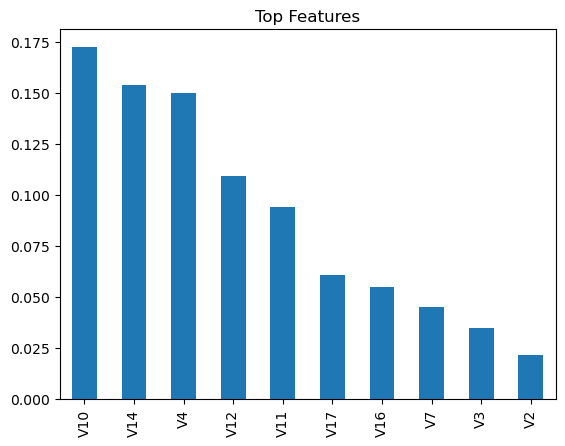

In [34]:
# examine feature importances to understand which features contributed most to the predictions
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar', title="Top Features")

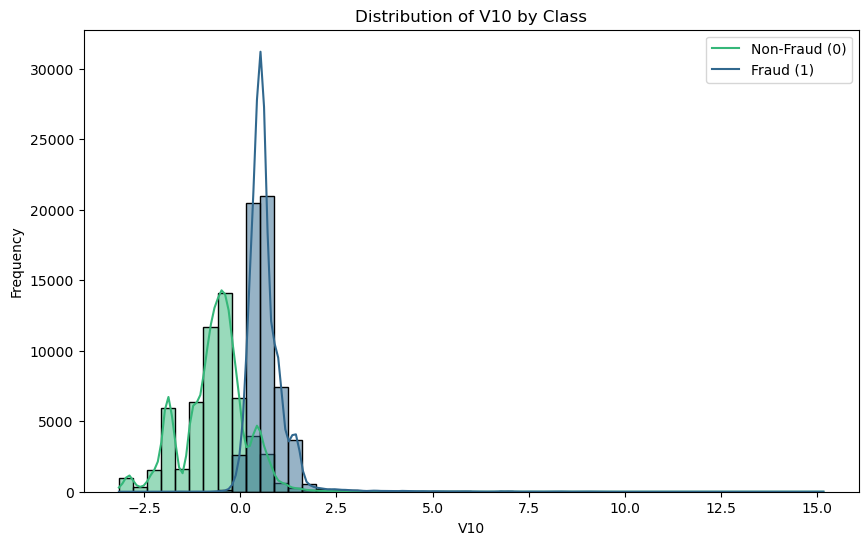

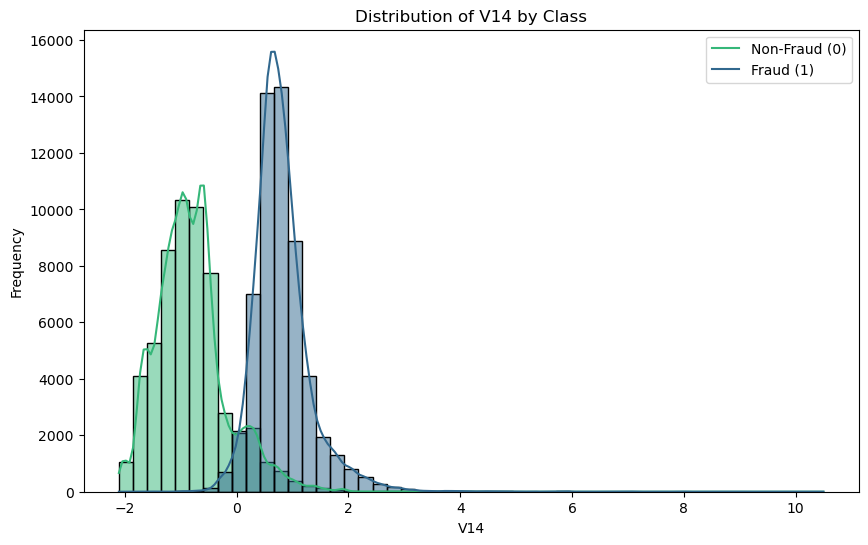

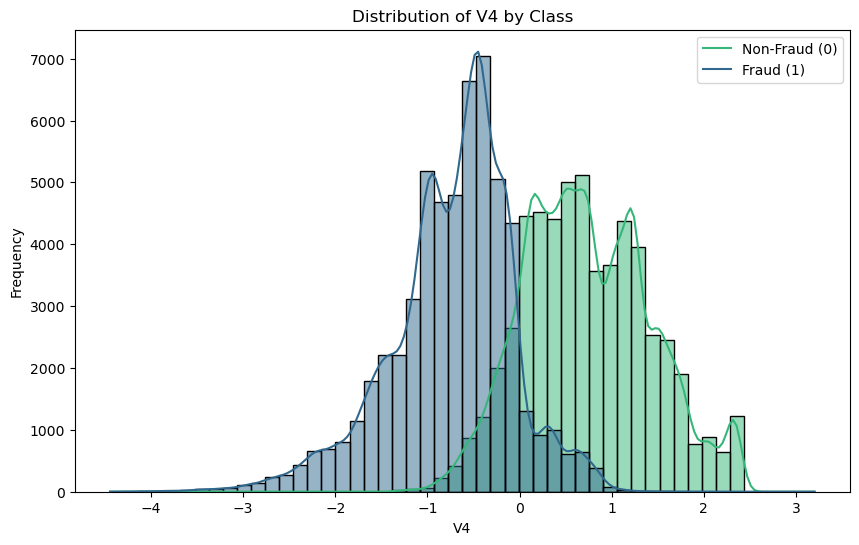

In [35]:
#Understand how the top 3 features differ across fraud (1) and non-fraud (0) cases.

# Plot feature distributions
top_features = ['V10', 'V14', 'V4']

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=X_test, x=feature, hue=y_test, kde=True, palette='viridis', bins=50)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(labels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.show()


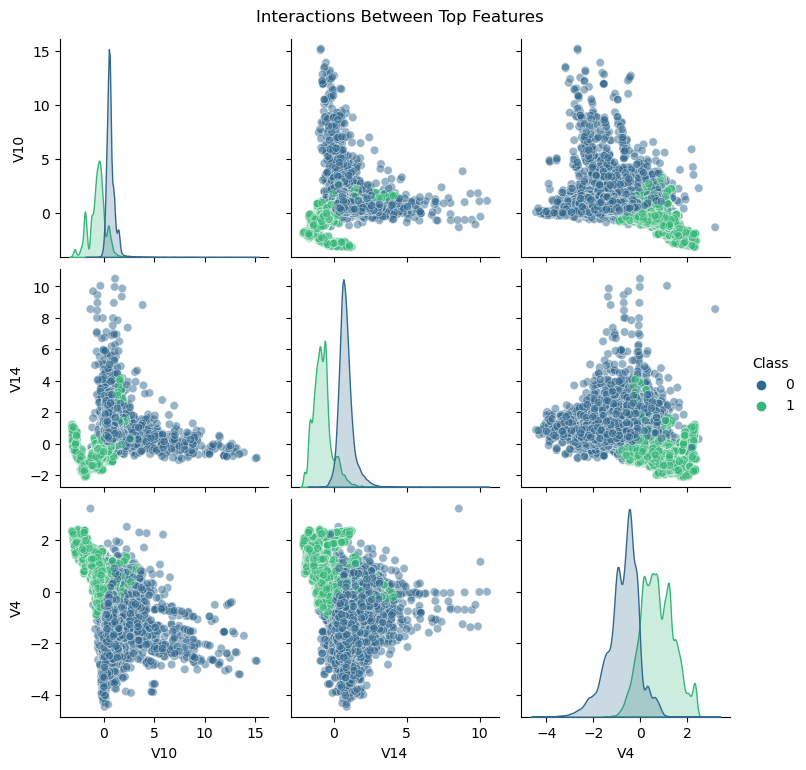

In [36]:
# Visualize how combinations of these features separate the classes.

# Pairplot between the top three features
sns.pairplot(
    data=X_test.assign(Class=y_test), 
    vars=top_features, 
    hue='Class', 
    palette='viridis', 
    diag_kind='kde', 
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Interactions Between Top Features', y=1.02)
plt.show()


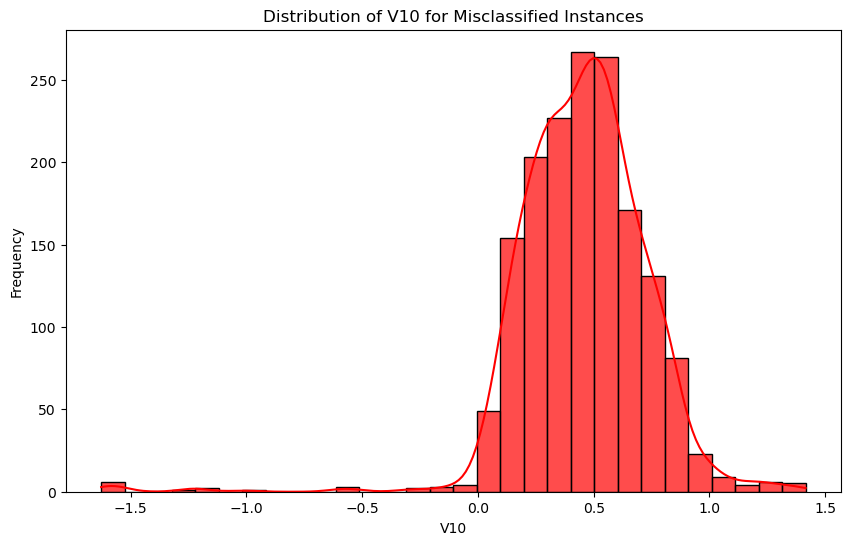

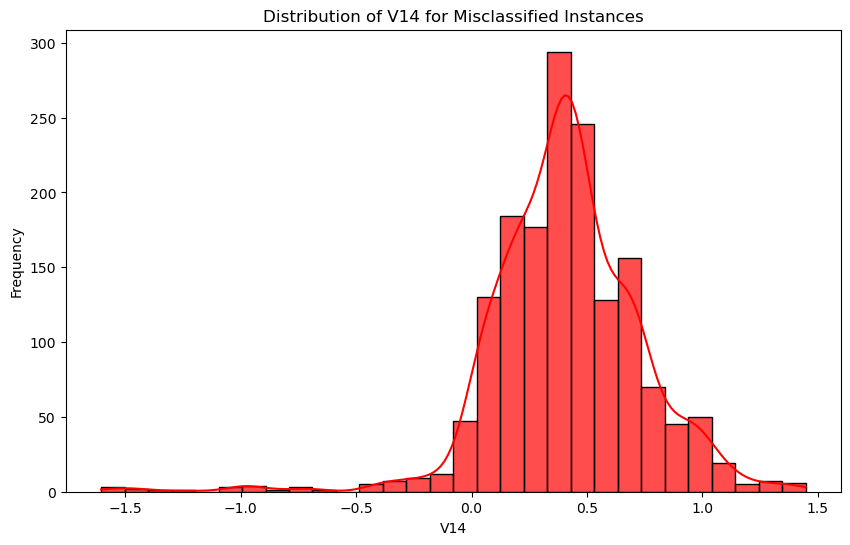

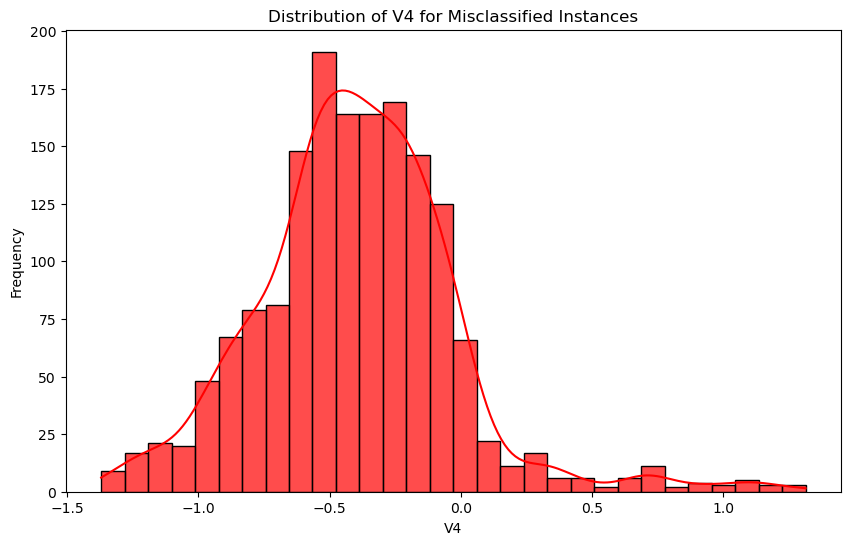

In [37]:
#  Error Analysis with Top Features

# Extract feature values for misclassified instances
misclassified_features = misclassified_data[top_features]

# Visualize misclassified instances in the top features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=misclassified_features, x=feature, kde=True, bins=30, color='red', alpha=0.7)
    plt.title(f'Distribution of {feature} for Misclassified Instances')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### Feature Engineering

In [38]:
# Model Refinement
# Objective: Improve model performance by leveraging insights from top features.
# Add Interaction Terms: Create new features as combinations of the top features.

# Add interaction terms
X_train['V10_V14'] = X_train['V10'] * X_train['V14']
X_train['V10_V4'] = X_train['V10'] * X_train['V4']
X_train['V14_V4'] = X_train['V14'] * X_train['V4']

X_test['V10_V14'] = X_test['V10'] * X_test['V14']
X_test['V10_V4'] = X_test['V10'] * X_test['V4']
X_test['V14_V4'] = X_test['V14'] * X_test['V4']


### Train new modified Random Forest model

In [39]:
# Re-train the Random Forest with interaction terms
model.fit(X_train, y_train)

# Evaluate the model again
y_preds_refined = model.predict(X_test)
print(classification_report(y_test, y_preds_refined))


# Performance metrics
print(f'\n Accuracy Score:{accuracy_score(y_test,y_preds_refined)}')
print(f'\n F1 Score:{f1_score(y_test,y_preds_refined)}')
print(f'\n Recall_score:{recall_score(y_test,y_preds_refined)}')
print(f'\n Precision_score:{precision_score(y_test,y_preds_refined)}')


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       1.00      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


 Accuracy Score:0.9877336756766263

 F1 Score:0.9876333076247973

 Recall_score:0.9776748104465038

 Precision_score:0.9977967650061798


### Model Evaluation

 - Goal: Assess the final model's performance using the testing dataset.

   - Generate confusion matrices to evaluate true positives, false positives, true negatives, and false negatives.
   - Plot the ROC curve and calculated the AUC score to measure how well the model distinguishes between fraud and non-fraud cases.

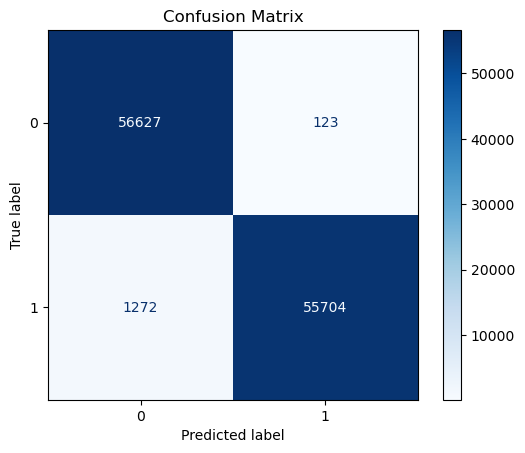

In [40]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_preds_refined)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

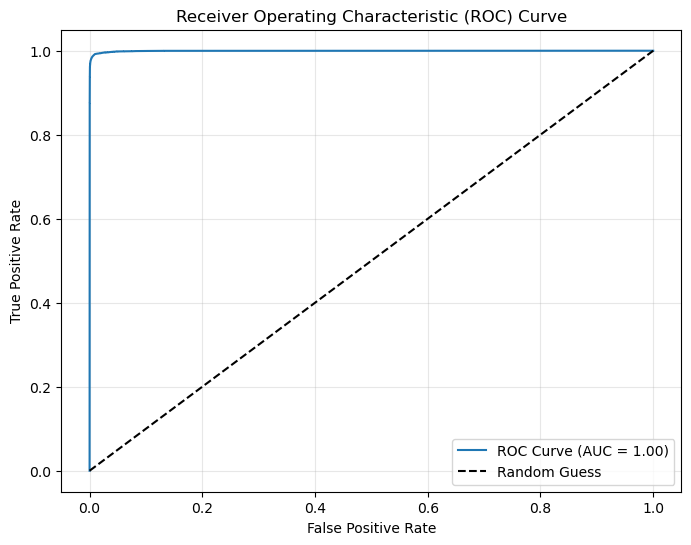

In [41]:

# The ROC curve shows the trade-off between TPR and FPR and helps evaluate the model's performance across different thresholds.
# AUC is a single number summary of the ROC curve; higher values indicate better discriminatory power.


from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### Deployment and Insights

 - Goal: Translate the model's results into actionable insights or integrate the model into a system.

   - Highlight key insights from the analysis, such as the most important features contributing to fraud detection.
   - Discuss potential applications of the model in real-time fraud prevention systems.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Custom transformer to add interaction terms
class InteractionTermTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['V10_V14'] = X_copy['V10'] * X_copy['V14']
        X_copy['V10_V4'] = X_copy['V10'] * X_copy['V4']
        X_copy['V14_V4'] = X_copy['V14'] * X_copy['V4']
        return X_copy


# Assuming 'X_train' and 'X_test' are already loaded

# Define the pipeline with feature engineering and model
pipeline = Pipeline([
    ('feature_engineering', InteractionTermTransformer()),  # Add interaction terms
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', RandomForestClassifier())  # Model
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(pipeline, 'refined_model_with_features_pipeline.pkl')

# Example of prediction on new data
new_data = pd.read_csv('synthetic_test_data.csv')

# Ensure new data has the same structure (check if interaction terms exist in new_data)
new_data = pipeline.named_steps['feature_engineering'].transform(new_data)

# Make predictions using the pipeline
y_pred_new = pipeline.predict(new_data)
print(y_pred_new)


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


### Conclusion

This project successfully addressed the challenge of fraud detection by using a Random Forest Classifier. By applying careful data preprocessing, model tuning, and regularization, I developed a robust model capable of identifying fraudulent transactions with high precision and recall. The solution has tangible business benefits, including reducing financial losses, protecting customers, and improving operational efficiency. The model is also deployable in a production environment and can be easily maintained and updated as needed.

While Logistic Regression and Decision Trees were also explored, the Random Forest model emerged as the most effective approach for the given problem. Future steps could involve exploring more advanced techniques (such as ensemble methods, boosting, or deep learning) and incorporating additional features to further improve the model's performance.